In [1]:
import pandas as pd
import numpy as np
import pymongo
import json
from pandas import read_csv, read_excel
import openpyxl

temp_train=read_excel("data1excel_train.xls")
temp_test=read_excel("data2excel_test.xls")
temp_train.to_csv("data1excel_train.csv")  
temp_test.to_csv("data2excel_test.csv")
train_df=read_csv("data1excel_train.csv")
test_df=read_csv("data2excel_test.csv")
train_df=train_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
test_df=test_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
print(train_df.head())
print(test_df.head())
# train_df.select_dtypes(("string"))
# test_df.select_dtypes(("string"))
# train_df.astype(np.float32)
# test_df.astype(np.float32)

train_df.dtypes
test_df.dtypes

   blue_1_summoner_level  blue_2_summoner_level  blue_3_summoner_level  \
0                    292                    360                    131   
1                     76                     39                    151   
2                    114                    116                    165   
3                     46                    263                    151   
4                    117                    155                    110   

   blue_4_summoner_level  blue_5_summoner_level  blue_kurtosis_summonerlevel  \
0                     48                     77                    -2.343819   
1                     76                     71                     3.036102   
2                    114                     95                     3.403980   
3                    136                    116                     1.822210   
4                    310                     29                     2.200739   

   blue_coefficient_of_skewness_summonerlevel  blue_mean_summonerlevel  \


blue_1_summoner_level    int64
blue_2_summoner_level    int64
blue_3_summoner_level    int64
blue_4_summoner_level    int64
blue_5_summoner_level    int64
                         ...  
assist2.1                int64
assist3.1                int64
assist4.1                int64
assist5.1                int64
blue_team_won?           int64
Length: 75, dtype: object

In [2]:
train_dataset=train_df.to_numpy()
test_dataset=test_df.to_numpy()

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)

x_train= train_dataset[:,0:74]
y_train=train_dataset[:,74]

x_test=test_dataset[:,0:74]
y_test=test_dataset[:,74]

print(f"x_train size:{len(x_train)}")
print(f"y_train size:{len(y_train)}")

print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")

x_train size:1910
y_train size:1910
x_test size: 1097
y_test size: 1097


In [11]:
frames=[train_df,test_df]
result=pd.concat(frames)
dataset=result.to_numpy()
np.random.shuffle(dataset)
X = dataset[:,0:74]
Y = dataset[:,74]
X.shape, Y.shape

((3007, 74), (3007,))

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=55, learning_rate=0.14)

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import sem


accuracy = []

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, random_state=None)

for train_index, test_index in skf.split(X, Y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]

    model.fit(x_train_fold, y_train_fold)
    prediction = model.predict(x_test_fold)
    score = accuracy_score(prediction, y_test_fold)
    accuracy.append(score * 100)


# Print the output.
print("List of possible accuracy: {}".format(accuracy))
print("\nMaximum Accuracy: {:.2f}%".format(max(accuracy)))
print("\nMinimum Accuracy: {:.2f}%".format(min(accuracy)))
print("\nOverall Accuracy: {:.2f}%".format(np.mean(accuracy)))
print("\nStandard Deviation is: {:.2f}%".format(np.std(accuracy)))
print("\nStandard Error is: {:.2f}%".format(sem(accuracy)))

KeyboardInterrupt: 

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

train_dataset = train_df.to_numpy()
test_dataset = test_df.to_numpy()

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)

x_train = train_dataset[:, 0:74]
y_train = train_dataset[:, 74]

x_test = test_dataset[:, 0:74]
y_test = test_dataset[:, 74]


print(f"x_train size: {len(x_train)}")
print(f"y_train size: {len(y_train)}")


print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")

model_final_test = GradientBoostingClassifier(n_estimators=55, learning_rate=0.14)
model_final_test.fit(x_train, y_train)

print("Accuracy: {:.2f}%".format(model_final_test.score(x_test, y_test) * 100))

predictions = model_final_test.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report:")
print(classification_report(y_test, predictions))

x_train size: 1910
y_train size: 1910
x_test size: 1097
y_test size: 1097
Accuracy: 90.88%
Confusion Matrix:
[[489  50]
 [ 50 508]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       539
         1.0       0.91      0.91      0.91       558

    accuracy                           0.91      1097
   macro avg       0.91      0.91      0.91      1097
weighted avg       0.91      0.91      0.91      1097



In [18]:
import joblib

model_final = GradientBoostingClassifier(n_estimators=55, learning_rate=0.14)
model_final.fit(X, Y)

# save the model to disk
filename = "Amelia_90_percent.sav"
joblib.dump(model_final, filename)

['Amelia_90_percent.sav']

In [9]:
train_dataset = train_df.to_numpy()
test_dataset = test_df.to_numpy()

np.random.shuffle(train_dataset)
np.random.shuffle(test_dataset)

x_train = train_dataset[:, 0:74]
y_train = train_dataset[:, 74]

x_test = test_dataset[:, 0:74]
y_test = test_dataset[:, 74]


print(f"x_train size: {len(x_train)}")
print(f"y_train size: {len(y_train)}")


print(f"x_test size: {len(x_test)}")
print(f"y_test size: {len(y_test)}")
print(x_train[1][3])
print(y_train[5])

x_train size: 1910
y_train size: 1910
x_test size: 1097
y_test size: 1097
196.0
0.0


In [10]:
from keras.initializers import HeNormal
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import joblib
import tensorflow as tf
import tensorflowjs as tfjs

initializer = HeNormal()
model = Sequential(
    [
        Dropout(0.0069, input_dim=74),
        BatchNormalization(),
        Dense(160, activation="elu", kernel_initializer=initializer),
        Dropout(0.0069),
        BatchNormalization(),
        Dense(128, activation="elu", kernel_initializer=initializer),
        Dropout(0.0069),
        BatchNormalization(),
        Dense(64, activation="elu", kernel_initializer=initializer),
        Dropout(0.0069),
        BatchNormalization(),
        Dense(32, activation="elu", kernel_initializer=initializer),
        Dropout(0.0069),
        BatchNormalization(),
        Dense(16, activation="elu", kernel_initializer=initializer),
        Dense(1, activation="sigmoid"),
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=150
)
filename = "Amelia_90_percent_not_gboosted.sav"
# joblib.dump(history, filename)
model.save('ameilia_model')
tfjs.converters.save_keras_model(model,'C:/vscode_file/amelia_model')


Epoch 1/50
13/13 [==============================] - 5s 70ms/step - loss: 0.5394 - accuracy: 0.7445 - val_loss: 1.7622 - val_accuracy: 0.5752
Epoch 2/50
13/13 [==============================] - 0s 18ms/step - loss: 0.3288 - accuracy: 0.8623 - val_loss: 1.0087 - val_accuracy: 0.6718
Epoch 3/50
13/13 [==============================] - 0s 18ms/step - loss: 0.2591 - accuracy: 0.8921 - val_loss: 0.6115 - val_accuracy: 0.7639
Epoch 4/50
13/13 [==============================] - 0s 18ms/step - loss: 0.2359 - accuracy: 0.8995 - val_loss: 0.4247 - val_accuracy: 0.8314
Epoch 5/50
13/13 [==============================] - 0s 21ms/step - loss: 0.2260 - accuracy: 0.9052 - val_loss: 0.3802 - val_accuracy: 0.8323
Epoch 6/50
13/13 [==============================] - 0s 22ms/step - loss: 0.2132 - accuracy: 0.9136 - val_loss: 0.2678 - val_accuracy: 0.8778
Epoch 7/50
13/13 [==============================] - 0s 20ms/step - loss: 0.1961 - accuracy: 0.9204 - val_loss: 0.2868 - val_accuracy: 0.8687
Epoch 8/50
13

In [11]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Train Accuracy: {:.2f}%".format(train_acc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

Train Accuracy: 99.95%
Test Accuracy: 89.33%


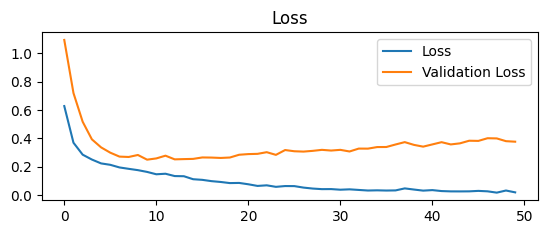

In [5]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title("Loss")
pyplot.plot(history.history["loss"], label="Loss")
pyplot.plot(history.history["val_loss"], label="Validation Loss")
pyplot.legend()
pyplot.show()

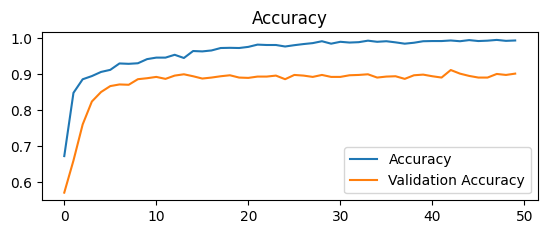

In [6]:
pyplot.subplot(212)
pyplot.title("Accuracy")
pyplot.plot(history.history["accuracy"], label="Accuracy")
pyplot.plot(history.history["val_accuracy"], label="Validation Accuracy")
pyplot.legend()
pyplot.show()